In [2]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from IPython.display import clear_output
from matplotlib.pyplot import imshow
import pandas as pd
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.activations import *
from tensorflow.keras.metrics import *
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras import backend as k
import datetime

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
train_df = pd.read_csv("../input/ucf101/UCF101TrainTestSplits-RecognitionTask/ucfTrainTestlist/trainlist01.txt",sep = " ",header = None,names = ['path','class'])
train_df

,path,class
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c01.avi,1
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c02.avi,1
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c03.avi,1
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c04.avi,1
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c05.avi,1
...,...,...
9532,YoYo/v_YoYo_g25_c01.avi,101
9533,YoYo/v_YoYo_g25_c02.avi,101
9534,YoYo/v_YoYo_g25_c03.avi,101
9535,YoYo/v_YoYo_g25_c04.avi,101


In [4]:
df = pd.read_csv("/input/ucf101/UCF101TrainTestSplits-RecognitionTask/ucfTrainTestlist/classInd.txt",sep = " ",header = None,names = ['class','ind'])
df

,class,ind
0,1,ApplyEyeMakeup
1,2,ApplyLipstick
2,3,Archery
3,4,BabyCrawling
4,5,BalanceBeam
...,...,...
96,97,VolleyballSpiking
97,98,WalkingWithDog
98,99,WallPushups
99,100,WritingOnBoard


In [5]:
content = []
i = 50
n = 50
while len(content) < 20 and i < 102:
    if len(train_df[train_df['class']==i]) >= n:
        df_temp = train_df[train_df['class']==i].iloc[:n]
        path = df_temp['path']
        content.append(path)
        
    i += 1
    

content = np.array(content)

In [6]:
content

array([['Knitting/v_Knitting_g08_c01.avi',
        'Knitting/v_Knitting_g08_c02.avi',
        'Knitting/v_Knitting_g08_c03.avi',
        'Knitting/v_Knitting_g08_c04.avi',
        'Knitting/v_Knitting_g09_c01.avi',
        'Knitting/v_Knitting_g09_c02.avi',
        'Knitting/v_Knitting_g09_c03.avi',
        'Knitting/v_Knitting_g09_c04.avi',
        'Knitting/v_Knitting_g09_c05.avi',
        'Knitting/v_Knitting_g10_c01.avi',
        'Knitting/v_Knitting_g10_c02.avi',
        'Knitting/v_Knitting_g10_c03.avi',
        'Knitting/v_Knitting_g10_c04.avi',
        'Knitting/v_Knitting_g10_c05.avi',
        'Knitting/v_Knitting_g10_c06.avi',
        'Knitting/v_Knitting_g10_c07.avi',
        'Knitting/v_Knitting_g11_c01.avi',
        'Knitting/v_Knitting_g11_c02.avi',
        'Knitting/v_Knitting_g11_c03.avi',
        'Knitting/v_Knitting_g11_c04.avi',
        'Knitting/v_Knitting_g11_c05.avi',
        'Knitting/v_Knitting_g11_c06.avi',
        'Knitting/v_Knitting_g12_c01.avi',
        'Kn

In [7]:
content.shape

(20, 50)

In [8]:
content = content.reshape(1000,)
content

array(['Knitting/v_Knitting_g08_c01.avi',
       'Knitting/v_Knitting_g08_c02.avi',
       'Knitting/v_Knitting_g08_c03.avi',
       'Knitting/v_Knitting_g08_c04.avi',
       'Knitting/v_Knitting_g09_c01.avi',
       'Knitting/v_Knitting_g09_c02.avi',
       'Knitting/v_Knitting_g09_c03.avi',
       'Knitting/v_Knitting_g09_c04.avi',
       'Knitting/v_Knitting_g09_c05.avi',
       'Knitting/v_Knitting_g10_c01.avi',
       'Knitting/v_Knitting_g10_c02.avi',
       'Knitting/v_Knitting_g10_c03.avi',
       'Knitting/v_Knitting_g10_c04.avi',
       'Knitting/v_Knitting_g10_c05.avi',
       'Knitting/v_Knitting_g10_c06.avi',
       'Knitting/v_Knitting_g10_c07.avi',
       'Knitting/v_Knitting_g11_c01.avi',
       'Knitting/v_Knitting_g11_c02.avi',
       'Knitting/v_Knitting_g11_c03.avi',
       'Knitting/v_Knitting_g11_c04.avi',
       'Knitting/v_Knitting_g11_c05.avi',
       'Knitting/v_Knitting_g11_c06.avi',
       'Knitting/v_Knitting_g12_c01.avi',
       'Knitting/v_Knitting_g12_c0

In [9]:
y = np.array([i//50 for i in range(0,1000)])
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4

In [10]:
def read_frames(root_folder,arr,each_nth=10):
    videos=[]
    for j  in range(len(arr)):
        clear_output()
        print(np.round(100*j/len(arr),3))
            
        vcap=cv2.VideoCapture(root_folder+arr[j])
        success=True
  
        frames=[]
        cnt=0
        while success:
            try:
              success,image=vcap.read()
              cnt+=1
              if cnt%each_nth==0:
                image=resize(image,(128,192))
                frames.append(image)
            except Exception as e:
                print(e)
        videos.append(frames)
    
    return videos

In [11]:
def select_frames(frames_arr , n=10):
    videos=[]
    for i in range(len(frames_arr)):
        frames=[]
        for t in np.linspace(0, len(frames_arr[i])-1, num=n):
            frames.append(frames_arr[i][int(t)])
        videos.append(frames)
        
    videos = np.array(videos)
    print(videos.shape)
    return videos

In [12]:
X_frames = read_frames("../input/ucf101/UCF101/UCF-101/",content)
X_frames = select_frames(X_frames, 10)

99.9
(1000, 10, 128, 192, 3)


In [13]:
np.save('/working/xframes.npy',X_frames)


In [14]:
y_n = to_categorical(y, 20)

In [15]:
xtr, xte, ytr , yte = train_test_split(X_frames , y_n , shuffle=True,test_size = 0.2,random_state = 42)

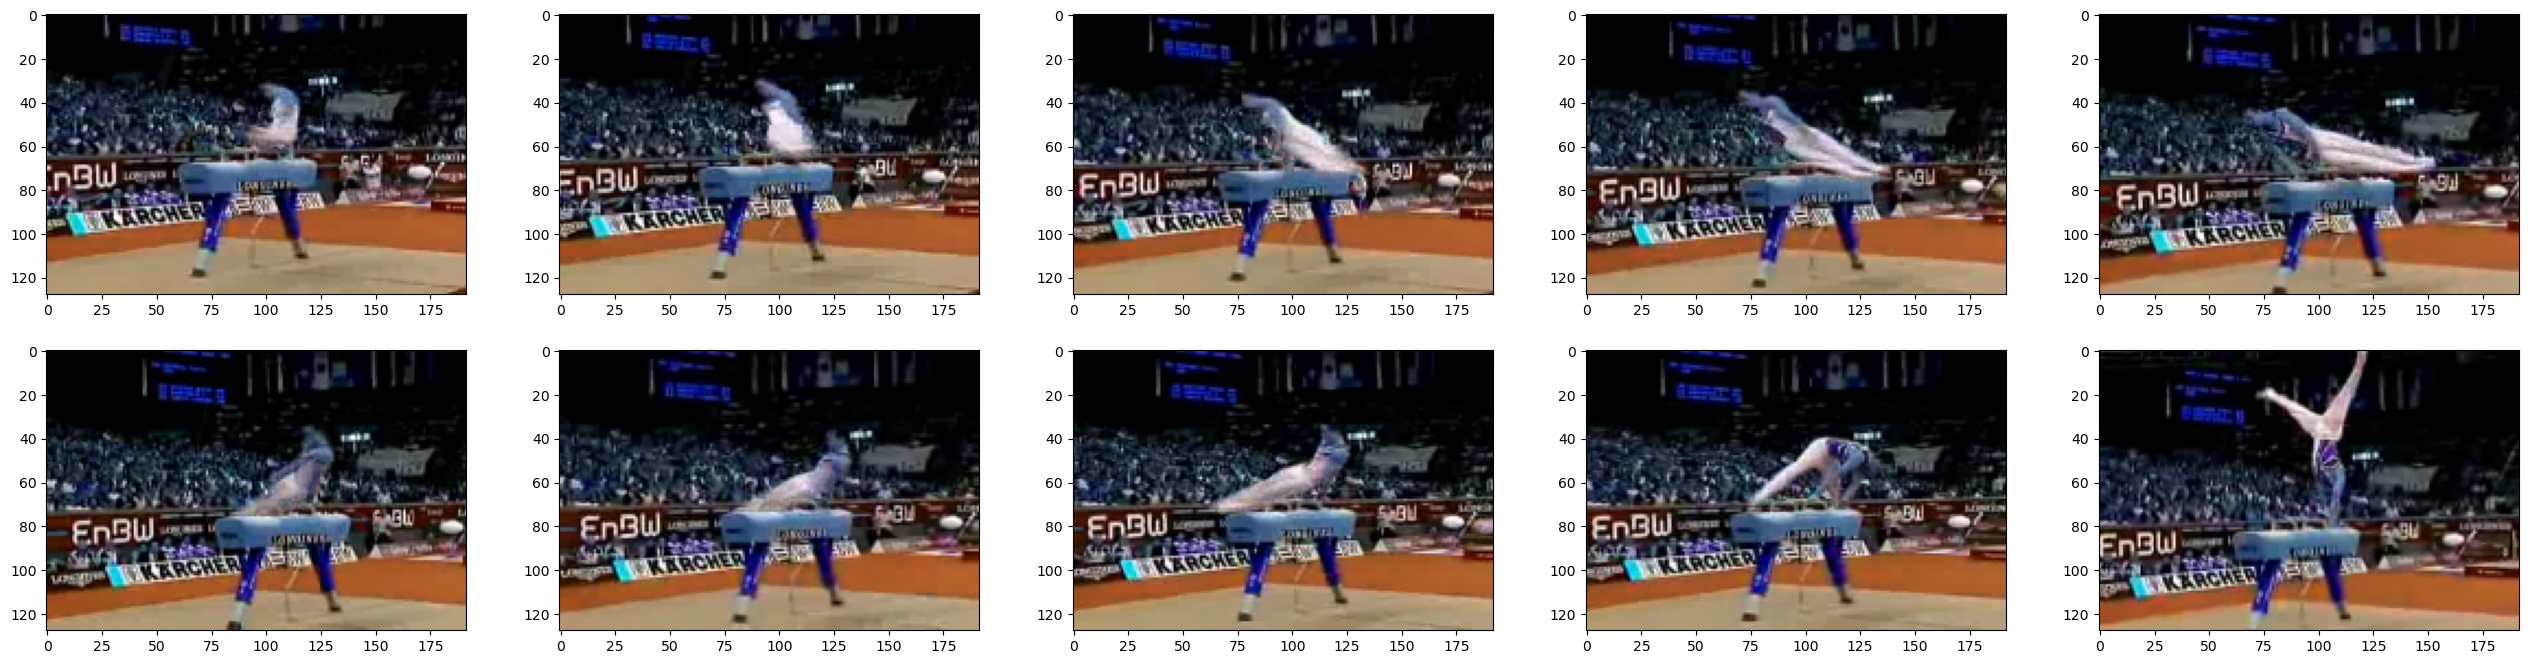

In [16]:
fig = plt.figure(figsize=(32,8))

random_video_index = np.random.randint(0,len(X_frames))

for i,image in enumerate(X_frames[random_video_index]):
    ax = plt.subplot(2,5,i+1)
    imshow(image)

In [17]:
def list_to_stack(xs):
  xs=tf.stack(xs, axis=1)
  s = tf.shape(xs)
 
  return xs

In [18]:
ish=(10, 128, 192, 3)
  
xs=[]


inp = Input(ish)

for slice_indx in range(0,10,1):
  x=Lambda(lambda x: x[:, slice_indx])(inp)
  x=BatchNormalization(momentum=0.8)(x)
  x=Conv2D(filters=20, kernel_size=3, padding='same', activation='relu')(x)
  x=BatchNormalization(momentum=0.8)(x)
  x=MaxPooling2D(pool_size=2)(x)
  
  x=Conv2D(filters=30, kernel_size=3, padding='same', activation='relu')(x)
  x=BatchNormalization(momentum=0.8)(x)
  x=MaxPooling2D(pool_size=2)(x)
  x=Conv2D(filters=30, kernel_size=3, padding='same', activation='relu')(x)
    
  xs.append(x)
  

t=Lambda(list_to_stack)(xs)
t=Conv3D(50,3,padding='same')(t)
t=BatchNormalization(momentum=0.8)(t)
target_shape=(10,32*48*50)
t=Reshape(target_shape)(t)
t=GRU(25, return_sequences=True)(t)
t=GRU(50, return_sequences=False,dropout=0.5)(t)

t=Dense(100,'relu')(t)
out=Dense(20, activation='softmax')(t)

model = Model(inputs=inp, outputs=out)
opt = tf.keras.optimizers.SGD(lr=0.0087)
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 128, 19  0           []                               
                                2, 3)]                                                            
                                                                                                  
 lambda (Lambda)                (None, 128, 192, 3)  0           ['input_1[0][0]']                
                                                                                                  
 lambda_1 (Lambda)              (None, 128, 192, 3)  0           ['input_1[0][0]']                
                                                                                                  
 lambda_2 (Lambda)              (None, 128, 192, 3)  0           ['input_1[0][0]']            

In [20]:
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = callbacks.ModelCheckpoint('/working/best_model.h5', monitor='val_loss', save_best_only=True)

In [21]:
 xtr[0].shape

(10, 128, 192, 3)

In [22]:
ytr.shape

(800, 20)

In [23]:
history1 = model.fit(xtr, ytr, epochs=15, batch_size=10,validation_data=(xte, yte),shuffle  = True,callbacks=[early_stopping, checkpoint])

Epoch 1/15
80/80 [==============================] - 280s 3s/step - loss: 2.8626 - accuracy: 0.1737 - val_loss: 2.7092 - val_accuracy: 0.2900
Epoch 2/15
80/80 [==============================] - 257s 3s/step - loss: 2.5304 - accuracy: 0.4200 - val_loss: 2.4937 - val_accuracy: 0.4450
Epoch 3/15
80/80 [==============================] - 253s 3s/step - loss: 2.2421 - accuracy: 0.5962 - val_loss: 2.2391 - val_accuracy: 0.5550
Epoch 4/15
80/80 [==============================] - 253s 3s/step - loss: 1.9480 - accuracy: 0.6913 - val_loss: 1.9670 - val_accuracy: 0.6250
Epoch 5/15
80/80 [==============================] - 260s 3s/step - loss: 1.6192 - accuracy: 0.7962 - val_loss: 1.7067 - val_accuracy: 0.6350
Epoch 6/15
80/80 [==============================] - 254s 3s/step - loss: 1.2856 - accuracy: 0.8587 - val_loss: 1.4836 - val_accuracy: 0.6650
Epoch 7/15
80/80 [==============================] - 253s 3s/step - loss: 1.0115 - accuracy: 0.9200 - val_loss: 1.2815 - val_accuracy: 0.7300
Epoch 8/15
80

In [24]:
model.save("/kaggle/working/ModelActionDetector15e.h5")

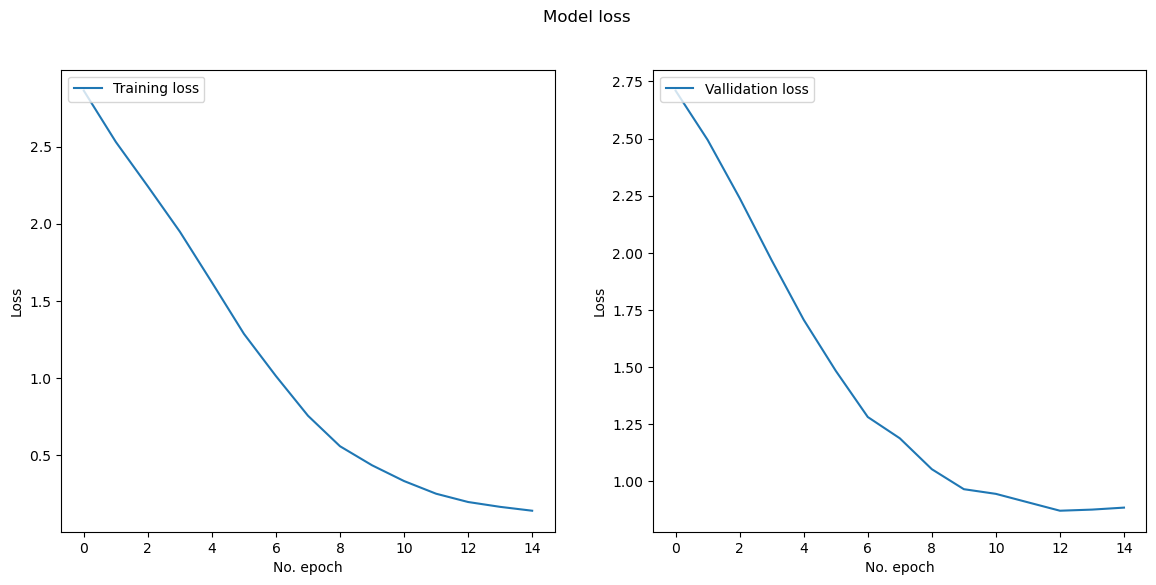

In [26]:
fig = plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
plt.plot(history1.history['loss'], label='Training loss')
ax.legend(loc="upper left")
plt.ylabel('Loss')
plt.xlabel('No. epoch')
ax = plt.subplot(1,2,2)
plt.plot(history1.history['val_loss'], label='Vallidation loss')
ax.legend(loc="upper left")
fig.suptitle('Model loss')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.show()

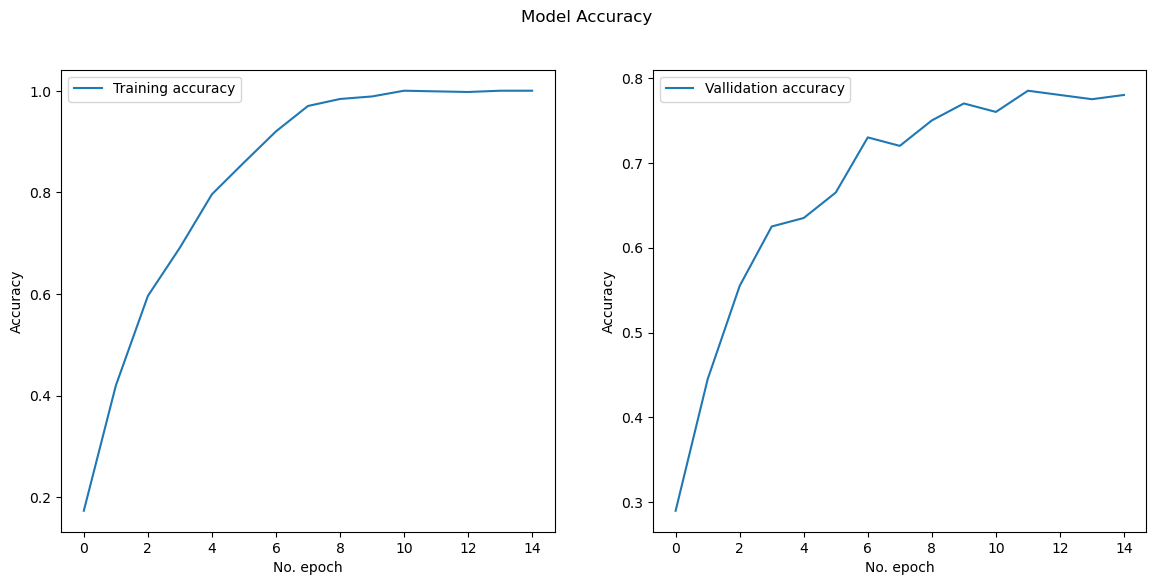

In [27]:
fig = plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'], label='Training accuracy')
ax.legend(loc="upper left")
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
ax = plt.subplot(1,2,2)
plt.plot(history1.history['val_accuracy'], label='Vallidation accuracy')
ax.legend(loc="upper left")
fig.suptitle('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.show()

In [28]:
classes = []
for i in range(len(content)):
    class_name = content[i].split('/')[0]
    if class_name not in classes:
        classes.append(class_name)
        
num_classes = [i for i in range(20)]
class_map = dict(zip(num_classes,classes))

In [ ]:
yte

In [33]:
random_videos = np.random.randint(0,len(xte),size=(10))
predicted  = model.predict(xte[random_videos],batch_size = 10)
predicted  = np.argmax(predicted,axis=1)

1/1 [==============================] - 1s 738ms/step


In [34]:
random_videos

array([ 73, 102,  73, 137,  45, 179, 153,  10,  25,  83])

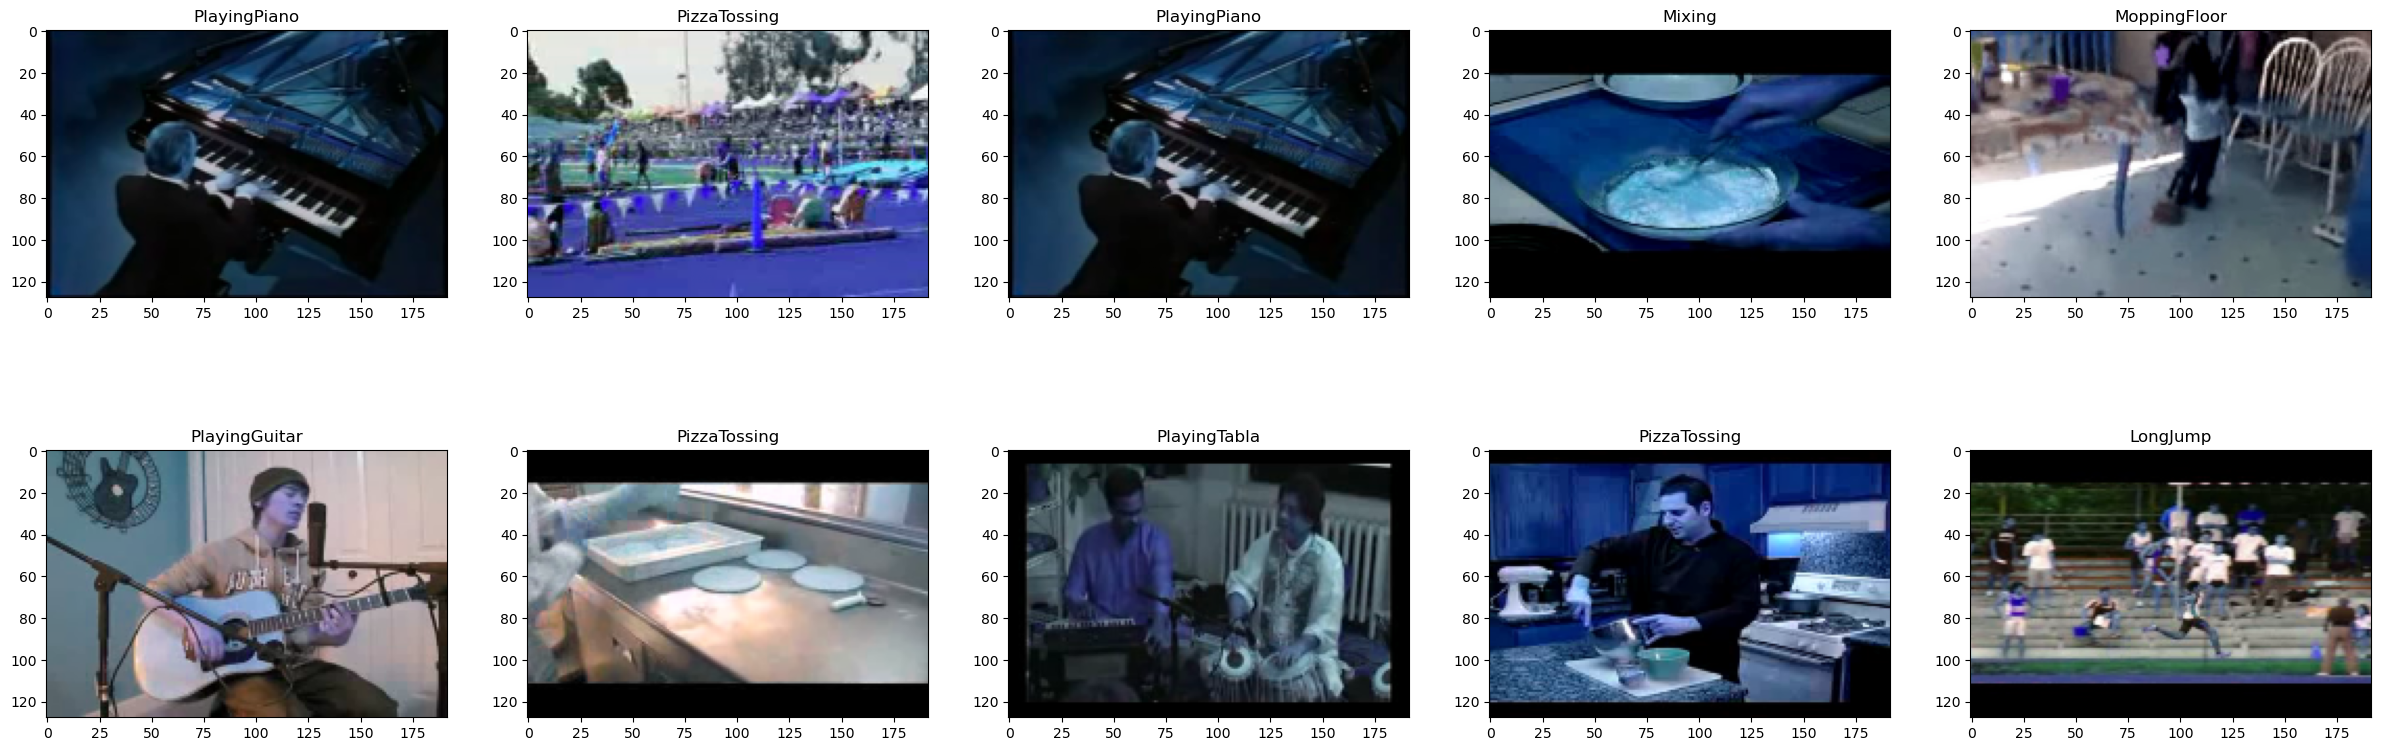

In [35]:
fig = plt.figure(figsize=(30,10))

for i,rand_indx in enumerate(random_videos):
    ax = plt.subplot(2,5,i+1)
    video = xte[rand_indx]
    frame = video[np.random.randint(0,10)]
    ax.set_title(class_map[predicted[i]])
    imshow(frame)